In [6]:
!tar -zxvf multiple_linear_regression.tgz

x multiple_linear_regression/
x multiple_linear_regression/ex0.txt


https://blog.csdn.net/weixin_46570668/article/details/112506263

200


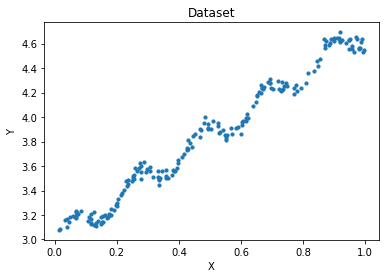

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def loadDataSet(filename):

    """
    函数说明:加载数据
    Parameters:
        fileName - 文件名
    Returns:
        xArr - x数据集
        yArr - y数据集
    """
#     with open("./multiple_linear_regression/ex0.txt") as f:
#         dataset = f.read()
        
    xArr, yArr = [], []
    for line in open(filename):
        line = line.strip().split()
        
        # 这一步中加float非常重要！！！！
        xArr.append([1.0, float(line[1])])
        yArr.append(float(line[2]))
    return xArr, yArr

def plotDataSet():
    """
    函数说明:绘制数据集
    Parameters:
        无
    Returns:
        无
    """
    filename = "./multiple_linear_regression/ex0.txt"
    xArr, yArr = loadDataSet(filename)
    X = np.array(xArr)
    Y = np.array(yArr)
    amount = np.shape(X)[0]
    print(amount)
    x, y = [],[]
    for i in range(amount):
        x.append(X[i, 1])
        y.append(Y[i])
    
    plt.scatter(x, y, s=10)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Dataset")
    plt.show()

if __name__ == '__main__':
    xArr, yArr = loadDataSet("./multiple_linear_regression/ex0.txt")
    plotDataSet()

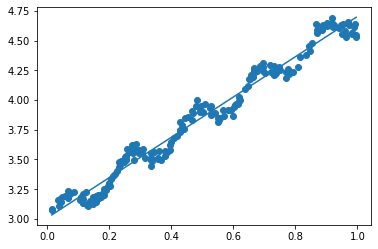

In [4]:
from numpy import *
import matplotlib.pyplot as plt

def standRegres(xArr,yArr):
    """
    计算最佳拟合直线
    parameters:
        xArr -给定的输入值
        yArr -给定的输出值
    return:
        ws -回归系数
    """
    xMat=mat(xArr)#转化为矩阵
    yMat=mat(yArr).T#求转置
    xTx=xMat.T*xMat
    #判断是否行列式为0
    if linalg.det(xTx) == 0.0:
        print("This matrix is singular")
        return
    #行列式不为0，可逆，根据公式计算回归系数
    ws=xTx.I*(xMat.T*yMat)
    return ws
    

def showLinerRegre():
    """
    绘制最佳拟合直线
    parameters:
        null
    return:
        null
    """
    xArr ,yArr = loadDataSet('multiple_linear_regression/ex0.txt') #加载数据集
    ws = standRegres(xArr,yArr)         #得到回归系数
    xMat=mat(xArr)
    yMat=mat(yArr)
    yHat=xMat*ws
    plt.scatter(xMat[:,1].flatten().A[0],yMat.T[:,0].flatten().A[0])
    xCopy=xMat.copy()
    xCopy.sort(0)
    yHat=xCopy*ws
    plt.plot(xCopy[:,1],yHat)
    plt.show()
#     ...
#     plt.show()
    
if __name__ =='__main__':
    showLinerRegre()

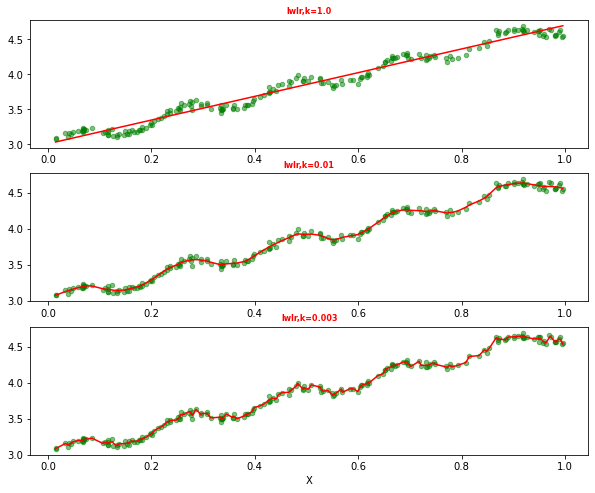

In [5]:

def lwlr(testPoint, xArr, yArr, k=1.0):
    """
    计算回归系数
    parameters:
        testPoint -待预测数据
        xArr -给定输入值
        yArr -给定输出值
        k -高斯核的k值，决定对附近的点赋予多大的权重
    return:
        testPoint * ws -回归系数的估计值
    """
    #转为矩阵形式
    xMat = mat(xArr); yMat = mat(yArr).T
    #样本个数
    m = shape(xMat)[0]
    weights = mat(eye((m)))  #创建m*m的单位矩阵，作为初始化对角权重矩阵
    for j in range(m):                             #遍历数据集计算每个样本的权重
        #计算预测点与该样本的偏差
        diffMat =testPoint-xMat[j, :]  
        #根据偏差利用函数赋予该样本相应的权重
        weights[j, j] = exp(diffMat * diffMat.T/(-2.0 * k**2))
    #将权重矩阵应用到公式中
    xTx = xMat.T * (weights * xMat)                   #m*m矩阵                     
    #计算行列式值是否为0，即确定是否可逆
    if linalg.det(xTx) == 0.0:
        return
    ws = xTx.I * (xMat.T * (weights * yMat))          #计算回归系数，m*1矩阵
    #返回测试点的预测值
    return testPoint*ws


def lwlrTest(testArr, xArr, yArr,k=1.0):
    """
    测试函数
    parameters:
        testArr -测试数据集
        xArr -给定输入值
        yArr -给定输出值
        k -高斯核的k值
    return:
        yHat -预测值
    """
    m=np.shape(testArr)[0]
    yHat=np.zeros(m)#用于存储预测结果
    for i in range(m):
        yHat[i]=lwlr(testArr[i],xArr,yArr,k)
    return yHat


def plotlwlrRegression():
    """
    绘制多条局部加权回归曲线
    parameters:
            无
    returns:
            无
     """
    xArr, yArr = loadDataSet('multiple_linear_regression/ex0.txt')                                    #加载数据集
    yHat_1 = lwlrTest(xArr, xArr, yArr, 1.0)                            #根据局部加权线性回归计算yHat
    yHat_2 = lwlrTest(xArr, xArr, yArr, 0.01)                            #根据局部加权线性回归计算yHat
    yHat_3 = lwlrTest(xArr, xArr, yArr, 0.003)                            #根据局部加权线性回归计算yHat
    xMat = mat(xArr)                                                    #创建xMat矩阵
    yMat = mat(yArr)                                                    #创建yMat矩阵
    srtInd = xMat[:, 1].argsort(0)                                        #排序，返回索引值
    xSort = xMat[srtInd][:,0,:]
    fig, axs = plt.subplots(nrows=3, ncols=1,sharex=False, sharey=False, figsize=(10,8))                                        
    axs[0].plot(xSort[:, 1], yHat_1[srtInd], c = 'red')                        #绘制回归曲线
    axs[1].plot(xSort[:, 1], yHat_2[srtInd], c = 'red')                        #绘制回归曲线
    axs[2].plot(xSort[:, 1], yHat_3[srtInd], c = 'red')                        #绘制回归曲线
    axs[0].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'green', alpha = .5)                #绘制样本点
    axs[1].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'green', alpha = .5)                #绘制样本点
    axs[2].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'green', alpha = .5)                #绘制样本点
    #设置标题,x轴label,y轴label
    axs0_title_text = axs[0].set_title(u'lwlr,k=1.0')
    axs1_title_text = axs[1].set_title(u'lwlr,k=0.01')
    axs2_title_text = axs[2].set_title(u'lwlr,k=0.003')
    plt.setp(axs0_title_text, size=8, weight='bold', color='red')  
    plt.setp(axs1_title_text, size=8, weight='bold', color='red')  
    plt.setp(axs2_title_text, size=8, weight='bold', color='red')  
    plt.xlabel('X')
    plt.show()

if __name__ == '__main__':
    plotlwlrRegression()

E:\Anaconda\envs\Jonas\lib\site-packages\sklearn\utils\validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
E:\Anaconda\envs\Jonas\lib\site-packages\sklearn\utils\validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
E:\Anaconda\envs\Jonas\lib\site-packages\sklearn\utils\validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


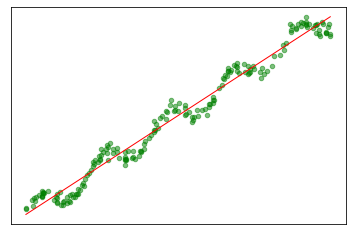

In [8]:
#!/usr/bin/env python
#-*- coding:utf-8 -*-
import matplotlib.pyplot as plt
from numpy import *
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


def loadDataSet(fileName):  
    numFeat=len(open(fileName).readline().split('\t'))-1
    with open(fileName) as fr:
        #~ numFeat=len(fr.readline().split('\t'))-1
        dataMat=[];labelMat=[]
        for line in fr.readlines():
            lineArr=[]
            curLine=line.strip().split('\t')
            for i in range(numFeat):
                lineArr.append(float(curLine[i]))
            dataMat.append(lineArr)
            labelMat.append(float(curLine[-1]))
        return dataMat,labelMat
    return dataMat,labelMat

if __name__ =='__main__':
    dataX, dataY =loadDataSet('multiple_linear_regression/ex0.txt')
    matX=mat(dataX);matY=mat(dataY).T #将数据保存到矩阵中
    regr = LinearRegression()  #生成线性回归模型
    regr.fit(matX,matY)#对训练集X, y进行训练。
    #填充训练数据 matX(n_samples,n_features);matY(n_samples,n_targets)

    xCopy = matX.copy()
    xCopy.sort(0)
    predictY = regr.predict(xCopy) #得到模型预测值 predict使用训练得到的估计器对输入为X的集合进行预测

    plt.scatter(matX[:,1].flatten().A[0],matY[:,0].flatten().A[0],s=20,color='green',alpha=.5) #绘制散点图
    plt.plot(xCopy[:,1],predictY,color='red',linewidth=1) #绘制最佳拟合直线
 
    plt.xticks(())
    plt.yticks(())

    plt.show()